It should be run on the google colab.

In this notebook, the dance videos in the AIST dataset can be annotated automatically to generate the annotation eaf file that can be opened with ELAN

The datasets involved in the code are the AIST and the AIST ++. They are the hiphop dances sequence videos and the 3d reconstructions of these dance ssequences in COCO format and the SMPL motion format.

The output data is the word lables of different segmentations of the dance sequence analyzed based on the template of the Functional Grammar of Hiphop Dances.

# 1.1 Installation

In [ ]:
# clone the aist++ github repository, to provide the tools analyzing aist ++ data
!git clone https://github.com/google/aistplusplus_api

Cloning into 'aistplusplus_api'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 306 (delta 43), reused 39 (delta 39), pack-reused 254 (from 1)
Receiving objects: 100% (306/306), 114.30 KiB | 3.36 MiB/s, done.
Resolving deltas: 100% (181/181), done.


In [ ]:
# go into the aist++ folder, to work within it
%cd aistplusplus_api

/content/aistplusplus_api


In [ ]:
!pip install --upgrade pip setuptools

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:

# install the aist++ api by running the files in the aist ++ folder
!pip install -r requirements.txt

!python setup.py install


  Cloning https://github.com/liruilong940607/aniposelib to /tmp/pip-req-build-ntr5w_p5
  Running command git clone --filter=blob:none --quiet https://github.com/liruilong940607/aniposelib /tmp/pip-req-build-ntr5w_p5
  Resolved https://github.com/liruilong940607/aniposelib to commit 6a1c252ec427d7c5c3c95ec50773c4371d80b053
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/liruilong940607/smplx to /tmp/pip-req-build-b200sh1h
  Running command git clone --filter=blob:none --quiet https://github.com/liruilong940607/smplx /tmp/pip-req-build-b200sh1h
  Resolved https://github.com/liruilong940607/smplx to commit 438732844373ea9ea7799a0d7a467426a674c6fe
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metad

In [ ]:
# install the packages that could be used , it takes a bit longer
!apt-get update
!apt-get install -y ffmpeg
!pip install aniposelib
!pip install smplx
!pip install numpy
!pip install chumpy
!pip install pickle
!pip install vedo
!pip install ipywidgets
!pip install pyyaml
!pip install pympi-ling pandas

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,449 kB]
Get:14 http://archive.ubuntu.com/u

In [ ]:
!pip install gdown

!pip install pydrive



In [ ]:
!pip install torch



# 1.2 import modules

In [ ]:
import fileinput
# import modules to get files on the google dirve and parse zip files
import zipfile
import os
# connect the colab to the google drive, to obtain the files used
from google.colab import drive
import fileinput
import pickle
import vedo
import numpy as np
import aistplusplus_api as aist
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from google.colab import files
from scipy.spatial.transform import Rotation as R
import torch
from smplx import SMPL
from math import pi
import matplotlib.colors as mcolors
import cv2

In [ ]:
import gdown
import os


# 1.3.prepare the files

In [ ]:
# connect the colab to the google drive, to obtain the files used

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# it takes a bit longer
# assign the Google Drive zip file path of the aist motion files
drive_zip_path = '/content/drive/MyDrive/aist_motion.zip '

# copy this zip file to this colab notebook working space
!cp $drive_zip_path /content/



In [ ]:
# extract the zip file of motion data, it takes a bit longer
local_zip_path = '/content/aist_motion.zip'
with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# check the list in the folder we are working in after extraction
!ls /content

aist_motion.zip  aistplusplus_api  aist_plusplus_final	drive  sample_data


In [ ]:
# Get the dance video, you can use your own video file here
file_url = 'https://drive.google.com/uc?id=1L2IVvq3Z_0DpiI9NRSCTADvEBE5JZb4I&export=download'

# download the dance video
output_path = '/content/'
# define the path of it
downloaded_file_path = gdown.download(file_url, output_path, quiet=False, fuzzy=True)

NameError: name 'gdown' is not defined

In [ ]:
file1 = os.path.basename(downloaded_file_path)



In [ ]:

print('Downloaded File Name:', file1)
file1

Downloaded File Name: gMH_sFM_c01_d24_mMH0_ch15.mp4


'gMH_sFM_c01_d24_mMH0_ch15.mp4'

In [ ]:

# cut off the extension name
basename = os.path.splitext(file1)[0]
basename = os.path.splitext(basename)[0]

# get the base name
import re

match = re.match(r"^[a-zA-Z0-9_]+", basename)
if match:
    extracted_name = match.group(0)
else:
    extracted_name = basename

print(extracted_name)  # 输出: gMH_sFM_c01_d24_mMH0_ch15

gMH_sFM_c01_d24_mMH0_ch15


In [ ]:
import re
# define a function
def replace_c_with_all(filename):
    # replace the c01 part to fit the naming form in the motion file in aist++
    new_filename = re.sub(r'_c\d{2}', '_cAll', filename)
    return new_filename



# use the funtction defiled, and add .pkl extension, this is to get the accurate corresponding motion file in aist++database
new_filename = replace_c_with_all(extracted_name)+'.pkl'

# 打印结果

print("New filename:", new_filename)

New filename: gMH_sFM_cAll_d24_mMH0_ch15.pkl


# 3. Adjust the scripts to fit the evironment

In [ ]:

# find the chumpy insitallation scipt
chumpy_init_file = '/usr/local/lib/python3.10/dist-packages/chumpy/__init__.py'

# adjust the code in it to fit the colab environment
with fileinput.FileInput(chumpy_init_file, inplace=True) as file:
    for line in file:
        line = line.replace('from numpy import bool, int, float, complex, object, unicode, str, nan, inf',
                            'from numpy import bool_, int_, float_, complex_, object_, str_, nan, inf')
        line = line.replace('np.bool', 'np.bool_')
        line = line.replace('np.int', 'np.int_')
        line = line.replace('np.float', 'np.float_')
        line = line.replace('np.complex', 'np.complex_')
        line = line.replace('np.object', 'np.object_')
        line = line.replace('np.str', 'np.str_')
        print(line, end='')


# 2.1 read the motion files

In [ ]:
# define the path the the aist++ dataset


# define the data sets path of the smpl model motion and 3d key point motion
motions_dataset_path = '/content/aist_plusplus_final/motions'
keypoints3d_dataset_path = '/content/aist_plusplus_final/keypoints3d'


In [ ]:
# obtain the videos
motions_dance_sequence_path = os.path.join(motions_dataset_path, new_filename)
keypoints_dance_path =os.path.join(keypoints3d_dataset_path, new_filename)

In [ ]:
# Read the pkl files of 3d key point data, naming it data1
with open(keypoints_dance_path, 'rb') as f:
      data1 = pickle.load(f)
print("Data loaded into data1")


data1

# Read the pkl files of 3d key point data, naming it data2
with open(motions_dance_sequence_path, 'rb') as f:
      data2 = pickle.load(f)
print("Data loaded into data1")
data2

Data loaded into data1
Data loaded into data1


{'smpl_loss': 2.139580726623535,
 'smpl_poses': array([[-2.9539911e-02, -7.1752465e-01,  8.1083328e-03, ...,
         -2.3999980e-03,  4.2494951e-04,  1.5324777e-03],
        [-4.1526642e-02, -7.2125804e-01, -4.7657657e-03, ...,
         -2.2203093e-03,  2.8785929e-04,  1.5436292e-03],
        [-6.7572773e-02, -7.3694491e-01, -2.2522936e-02, ...,
         -2.1699497e-03,  2.4473011e-05,  1.7666065e-03],
        ...,
        [ 6.9543175e-02, -6.6148780e-02,  1.4184955e-02, ...,
          1.0275356e-03,  2.4176962e-03,  2.1692428e-03],
        [ 7.0248172e-02, -6.8760350e-02,  1.4313864e-02, ...,
          1.0989556e-03,  2.2483098e-03,  2.0471762e-03],
        [ 7.2745688e-02, -6.7758560e-02,  1.4667925e-02, ...,
          1.1200366e-03,  2.5162057e-03,  2.2283092e-03]], dtype=float32),
 'smpl_scaling': array([89.070786], dtype=float32),
 'smpl_trans': array([[  4.7239566, 158.05374  , -15.658986 ],
        [  4.620444 , 157.23798  , -16.009653 ],
        [  4.514341 , 156.13101  , -16.

In [ ]:
# 查看数据类型
print("Data Type of 'smpl_loss':", type(data2['smpl_loss']))
print("Data Type of 'smpl_poses':", type(data2['smpl_poses']))
print("Data Type of 'smpl_scaling':", type(data2['smpl_scaling']))
print("Data Type of 'smpl_trans':", type(data2['smpl_trans']))

# 查看数组形状
print("Shape of 'smpl_poses':", data2['smpl_poses'].shape)
print("Shape of 'smpl_scaling':", data2['smpl_scaling'].shape)
print("Shape of 'smpl_trans':", data2['smpl_trans'].shape)


Data Type of 'smpl_loss': <class 'float'>
Data Type of 'smpl_poses': <class 'numpy.ndarray'>
Data Type of 'smpl_scaling': <class 'numpy.ndarray'>
Data Type of 'smpl_trans': <class 'numpy.ndarray'>
Shape of 'smpl_poses': (2878, 72)
Shape of 'smpl_scaling': (1,)
Shape of 'smpl_trans': (2878, 3)


In [ ]:
type(data1['keypoints3d'])

numpy.ndarray

In [ ]:
data1['keypoints3d'].shape

(2878, 17, 3)

In [ ]:
data1

{'keypoints3d': array([[[-12.81752274, 181.41862469,  13.30894335],
         [-11.07256258, 186.45937859,  15.26504679],
         [-15.95667502, 184.23277279,  11.14333111],
         ...,
         [-22.75173134, 103.931137  , -18.89304282],
         [ 28.45018335,  71.04152237,   6.21456391],
         [-26.6611425 ,  69.88339911, -38.41755806]],
 
        [[-13.48835089, 178.21923979,  12.65486908],
         [-12.10082877, 182.88663527,  14.13811237],
         [-16.74391113, 181.33851126,  11.08874172],
         ...,
         [-23.64991198, 103.59581892, -19.25862081],
         [ 28.84219043,  70.34766178,   6.18303938],
         [-26.36338107,  69.36848186, -39.78355452]],
 
        [[-14.77840873, 175.71480887,  12.20209069],
         [-12.96871197, 179.59611464,  13.13224973],
         [-18.40851127, 179.0576436 ,  11.23234748],
         ...,
         [-25.11540674, 103.17891393, -19.95094119],
         [ 28.86601543,  69.87713216,   5.71863035],
         [-27.08616242,  70.55321567

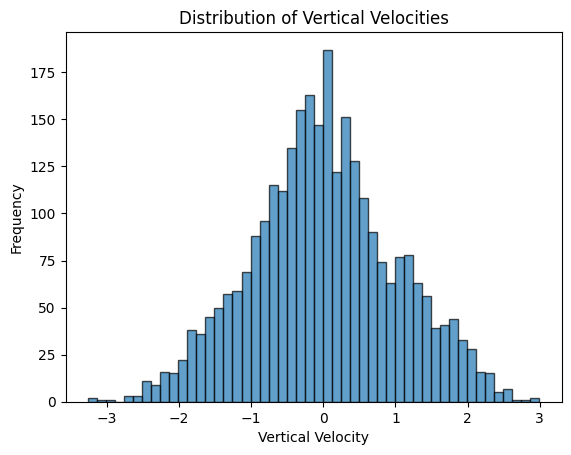

Mean Vertical Velocity: 0.004676169379964191
Standard Deviation: 1.0045918228321153
Minimum Vertical Velocity: -3.2589520840536212
Maximum Vertical Velocity: 2.992318783244116
Quantiles: 
0.25   -0.646147
0.50   -0.022205
0.75    0.635152
Name: Vertical_Velocity, dtype: float64


,Frame,Vertical_Velocity
0,0,-1.668577
1,1,-1.705234
2,2,-1.244084
3,3,-0.832955
4,4,-0.400385
...,...,...
2872,2872,0.264127
2873,2873,-0.132810
2874,2874,-0.273802
2875,2875,-0.037722


In [ ]:

#get the 3d keypoints motion data in COCO farmat, assign it the name "keypoints"
keypoints = data1['keypoints3d']
# Get the shape of the keypoints array and unpack the dimensions into num_frames, num_joints, and an unused variable.
num_frames, num_joints, _ = keypoints.shape

# exclude the data of wrists and elbows, because we want to evaluate the entire vertical velocity trendency of the body ,while arms are not incleded
exclude_indices = [7, 8, 9, 10]
include_indices = [i for i in range(num_joints) if i not in exclude_indices]

# Initialize a 3D array of zeros to store velocities
# The shape of the array is (num_frames - 1, len(include_indices), 3)
# - num_frames - 1: Number of frames minus one, since velocities are calculated between consecutive frames
# - len(include_indices): Number of joints/keypoints to include, based on the length of the include_indices list
# - 3: Each velocity has three components (x, y, z) for the 3D coordinates
velocities = np.zeros((num_frames - 1, len(include_indices), 3))

# calculate the vertical velocities between every two frames
# Loop over each frame from 0 to num_frames - 2
for i in range(num_frames - 1):
# Calculate the difference between consecutive frames for the included keypoints
    # keypoints[i + 1, include_indices, :] refers to the keypoints of frame i+1 for the included indices
    # keypoints[i, include_indices, :] refers to the keypoints of frame i for the included indices
    # Subtracting these two arrays gives the velocity for each keypoint between these two frames
    velocities[i] = keypoints[i + 1, include_indices, :] - keypoints[i, include_indices, :]

# calculate the mean velocities by extrate the velocities on y axis, which is the vertical axis with COCO farmat
avg_velocities = np.mean(velocities, axis=1)

# Set the window length for the Savitzky-Golay filter
##window_length = 11
# Set the polynomial order for the Savitzky-Golay filter
##polyorder = 2
# Apply the Savitzky-Golay filter to smooth the average velocities
# avg_velocities: The array of average velocities to be smoothed
# window_length: The length of the filter window (i.e., the number of coefficients). Must be an odd number.
# polyorder: The order of the polynomial used to fit the samples. Must be less than window_length.
# axis=0: Specifies that the filter is applied along the first dimension (i.e., the frame pairs).
##smoothed_velocities = savgol_filter(avg_velocities, window_length, polyorder, axis=0)

##vertical_velocities = smoothed_velocities[:, 1]

vertical_velocities = avg_velocities[:, 1]

# create a dataframe
df = pd.DataFrame({
    'Frame': np.arange(len(vertical_velocities)),
    'Vertical_Velocity': vertical_velocities
})

# show the distribution of velocities
plt.hist(df['Vertical_Velocity'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Vertical Velocities')
plt.xlabel('Vertical Velocity')
plt.ylabel('Frequency')
plt.show()

# get the simple statistical result
mean_velocity = df['Vertical_Velocity'].mean()
std_velocity = df['Vertical_Velocity'].std()
min_velocity = df['Vertical_Velocity'].min()
max_velocity = df['Vertical_Velocity'].max()
quantiles = df['Vertical_Velocity'].quantile([0.25, 0.5, 0.75])

print(f'Mean Vertical Velocity: {mean_velocity}')
print(f'Standard Deviation: {std_velocity}')
print(f'Minimum Vertical Velocity: {min_velocity}')
print(f'Maximum Vertical Velocity: {max_velocity}')
print(f'Quantiles: \n{quantiles}')

df

In [ ]:
# 定义段落分割函数
def segment_velocities(vertical_velocities, velocity_threshold, min_duration=2):
    segments = []

    # 更严格的初始方向检测：考虑前几帧数据的趋势
    initial_direction = 'static'
    for i in range(min(min_duration, len(vertical_velocities))):
        if vertical_velocities[i] > velocity_threshold:
            initial_direction = 'up'
            break
        elif vertical_velocities[i] < -velocity_threshold:
            initial_direction = 'down'
            break

    current_segment = {'direction': initial_direction, 'start': 0}

    for i in range(0, len(vertical_velocities)):  # 从索引0开始遍历
        if abs(vertical_velocities[i]) < velocity_threshold:
            direction = 'elaboration'
        elif vertical_velocities[i] > velocity_threshold:
            direction = 'up'
        elif vertical_velocities[i] < -velocity_threshold:
            direction = 'down'
        else:
            direction = current_segment['direction']

        if direction != current_segment['direction']:
            # 如果当前段落持续时间足够长，则保存当前段落
            if i - current_segment['start'] >= min_duration:
                current_segment['end'] = i
                segments.append(current_segment)
                current_segment = {'direction': direction, 'start': i}
            else:
                # 否则，将当前段落方向设置为新方向，不保存当前段落
                current_segment['direction'] = direction

    # 处理最后一个段落
    current_segment['end'] = len(vertical_velocities)
    if current_segment['end'] - current_segment['start'] >= min_duration:
        segments.append(current_segment)

    return segments

# 调整参数并使用 segment_velocities 函数
velocity_threshold = 0.9 * std_velocity  # 调整阈值
min_duration = 1 # 增加最小持续时间以过滤掉短时间的变化
segments = segment_velocities(vertical_velocities, velocity_threshold, min_duration)

for segment in segments:
    print(f"Direction: {segment['direction']}, Start Frame: {segment['start']}, End Frame: {segment['end']}")

# 创建一个DataFrame用于ELAN
moves_segments = []

for segment in segments:
    start_frame = segment['start']
    end_frame = segment['end']
    direction = segment['direction']
    moves_segments.append(['e_Moves', start_frame, end_frame, direction])
e_moves_segments = pd.DataFrame(moves_segments, columns=['tier', 'start_frame', 'end_frame', 'annotation'])
e_moves_segments_csv_file_path = '/content/e_moves_segments_for_elan.csv'
e_moves_segments.to_csv(e_moves_segments_csv_file_path, index=False)


e_moves_segments


Direction: down, Start Frame: 0, End Frame: 3
Direction: elaboration, Start Frame: 3, End Frame: 7
Direction: up, Start Frame: 7, End Frame: 17
Direction: elaboration, Start Frame: 17, End Frame: 33
Direction: down, Start Frame: 33, End Frame: 41
Direction: elaboration, Start Frame: 41, End Frame: 45
Direction: up, Start Frame: 45, End Frame: 54
Direction: elaboration, Start Frame: 54, End Frame: 55
Direction: up, Start Frame: 55, End Frame: 56
Direction: elaboration, Start Frame: 56, End Frame: 77
Direction: down, Start Frame: 77, End Frame: 84
Direction: elaboration, Start Frame: 84, End Frame: 88
Direction: up, Start Frame: 88, End Frame: 99
Direction: elaboration, Start Frame: 99, End Frame: 123
Direction: down, Start Frame: 123, End Frame: 128
Direction: elaboration, Start Frame: 128, End Frame: 134
Direction: up, Start Frame: 134, End Frame: 146
Direction: elaboration, Start Frame: 146, End Frame: 172
Direction: down, Start Frame: 172, End Frame: 174
Direction: elaboration, Start

,tier,start_frame,end_frame,annotation
0,e_Moves,0,3,down
1,e_Moves,3,7,elaboration
2,e_Moves,7,17,up
3,e_Moves,17,33,elaboration
4,e_Moves,33,41,down
...,...,...,...,...
373,e_Moves,2789,2793,elaboration
374,e_Moves,2793,2806,up
375,e_Moves,2806,2832,elaboration
376,e_Moves,2832,2833,down


In [ ]:
segments

[{'direction': 'down', 'start': 0, 'end': 3},
 {'direction': 'elaboration', 'start': 3, 'end': 7},
 {'direction': 'up', 'start': 7, 'end': 17},
 {'direction': 'elaboration', 'start': 17, 'end': 33},
 {'direction': 'down', 'start': 33, 'end': 41},
 {'direction': 'elaboration', 'start': 41, 'end': 45},
 {'direction': 'up', 'start': 45, 'end': 54},
 {'direction': 'elaboration', 'start': 54, 'end': 55},
 {'direction': 'up', 'start': 55, 'end': 56},
 {'direction': 'elaboration', 'start': 56, 'end': 77},
 {'direction': 'down', 'start': 77, 'end': 84},
 {'direction': 'elaboration', 'start': 84, 'end': 88},
 {'direction': 'up', 'start': 88, 'end': 99},
 {'direction': 'elaboration', 'start': 99, 'end': 123},
 {'direction': 'down', 'start': 123, 'end': 128},
 {'direction': 'elaboration', 'start': 128, 'end': 134},
 {'direction': 'up', 'start': 134, 'end': 146},
 {'direction': 'elaboration', 'start': 146, 'end': 172},
 {'direction': 'down', 'start': 172, 'end': 174},
 {'direction': 'elaboration',

In [ ]:
import pandas as pd

# 合并 up 或 down 段后的 elaboration 段
merged_segments = []
elaboration_segments = []
i = 0

while i < len(segments):
    segment = segments[i]
    if segment['direction'] in ['up', 'down']:
        # 合并后续所有的 elaboration 段
        while i + 1 < len(segments) and segments[i + 1]['direction'] == 'elaboration':
            segment['end'] = segments[i + 1]['end']
            elaboration_segments.append({
                'start': segments[i + 1]['start'],
                'end': segments[i + 1]['end'],
                'parent_move': len(merged_segments) + 1  # 保存父Move的编号
            })
            i += 1
        merged_segments.append(segment)
    i += 1
# 创建一个DataFrame用于ELAN
md_segments = []
move_counter = 1  # 初始化计数器

for segment in merged_segments:
    move_id = f"M{move_counter}_{segment['direction']}"  # 生成编号和方向
    md_segments.append(['Moves', segment['start'], segment['end'], move_id])
    move_counter += 1  # 增加计数器

# 生成Elaboration段的DataFrame
elaboration_md_segments = []

for elaboration_segment in elaboration_segments:
    elaboration_id = f"M{elaboration_segment['parent_move']}E"
    elaboration_md_segments.append(['Elaboration', elaboration_segment['start'], elaboration_segment['end'], elaboration_id])

# 创建DataFrame并保存为CSV文件
moves_segments = pd.DataFrame(md_segments, columns=['tier', 'start_frame', 'end_frame', 'annotation'])
moves_segments_csv_file_path = '/content/moves_segments_for_elan.csv'
moves_segments.to_csv(moves_segments_csv_file_path, index=False)
# 打印结果
print(f"Final ELAN CSV file saved at: {moves_segments_csv_file_path}")

elaboration_segments_df = pd.DataFrame(elaboration_md_segments, columns=['tier', 'start_frame', 'end_frame', 'annotation'])
elaboration_csv_file_path = '/content/elaboration_segments_for_elan.csv'
elaboration_segments_df.to_csv(elaboration_csv_file_path, index=False)

# 打印结果
print(f"Elaboration ELAN CSV file saved at: {elaboration_csv_file_path}")

Final ELAN CSV file saved at: /content/moves_segments_for_elan.csv
Elaboration ELAN CSV file saved at: /content/elaboration_segments_for_elan.csv


In [ ]:
elaboration_segments_df

,tier,start_frame,end_frame,annotation
0,Elaboration,3,7,M1E
1,Elaboration,17,33,M2E
2,Elaboration,41,45,M3E
3,Elaboration,54,55,M4E
4,Elaboration,56,77,M5E
...,...,...,...,...
184,Elaboration,2746,2750,M185E
185,Elaboration,2762,2778,M186E
186,Elaboration,2789,2793,M187E
187,Elaboration,2806,2832,M188E


In [ ]:
anno_list = []
anno_list.append(moves_segments)
anno_list.append(elaboration_segments_df)

In [ ]:


# 新代码：合并每两个分段并分类
combined_segments = []
for i in range(0, len(merged_segments) - 1, 2):
    segment1 = merged_segments[i]
    segment2 = merged_segments[i + 1]

    combined_start = segment1['start']
    combined_end = segment2['end']

    if segment1['direction'] == segment2['direction']:
        if segment1['direction'] == 'up':
            combined_direction = 'cuu'
        else:
            combined_direction = 'cdd'
    else:
        if segment1['direction'] == 'up' and segment2['direction'] == 'down':
            combined_direction = 'vud'
        else:
            combined_direction = 'vdu'

    combined_segments.append({
        'direction': combined_direction,
        'start': combined_start,
        'end': combined_end
    })

# 打印合并后的分段结果
for segment in combined_segments:
    print(f"Direction: {segment['direction']}, Start Frame: {segment['start']}, End Frame: {segment['end']}")

# 创建一个DataFrame用于ELAN
final_syntactic_segments = []
syntactic_counter = 1  # 初始化计数器

for segment in combined_segments:
    start_frame = segment['start']  # 保留帧数
    end_frame = segment['end']      # 保留帧数
    annotation = f"S{syntactic_counter} {segment['direction']}"  # 添加计数器和原注释
    final_syntactic_segments.append(['MBS_Syntactic structures', start_frame, end_frame, annotation])
    syntactic_counter += 1  # 增加计数器

# 转换为DataFrame并保存为CSV文件
final_syntactic_df  = pd.DataFrame(final_syntactic_segments, columns=['tier', 'start_frame', 'end_frame', 'annotation'])
final_syntactic_csv_file_path = '/content/e_moves_segments_for_elan.csv'
final_syntactic_df.to_csv(e_moves_segments_csv_file_path, index=False)


# 打印结果
print(f"Final ELAN CSV file saved at: {final_syntactic_csv_file_path}")
final_syntactic_df


Direction: vdu, Start Frame: 0, End Frame: 33
Direction: vdu, Start Frame: 33, End Frame: 55
Direction: vud, Start Frame: 55, End Frame: 88
Direction: vud, Start Frame: 88, End Frame: 134
Direction: vud, Start Frame: 134, End Frame: 224
Direction: cuu, Start Frame: 224, End Frame: 256
Direction: vdu, Start Frame: 256, End Frame: 272
Direction: cuu, Start Frame: 272, End Frame: 347
Direction: cdd, Start Frame: 347, End Frame: 393
Direction: vdu, Start Frame: 393, End Frame: 435
Direction: vdu, Start Frame: 435, End Frame: 451
Direction: vud, Start Frame: 451, End Frame: 509
Direction: vdu, Start Frame: 509, End Frame: 516
Direction: vud, Start Frame: 516, End Frame: 533
Direction: cdd, Start Frame: 533, End Frame: 570
Direction: vud, Start Frame: 570, End Frame: 590
Direction: vud, Start Frame: 590, End Frame: 613
Direction: vdu, Start Frame: 613, End Frame: 749
Direction: vdu, Start Frame: 749, End Frame: 799
Direction: vdu, Start Frame: 799, End Frame: 844
Direction: vdu, Start Frame:

,tier,start_frame,end_frame,annotation
0,MBS_Syntactic structures,0,33,S1 vdu
1,MBS_Syntactic structures,33,55,S2 vdu
2,MBS_Syntactic structures,55,88,S3 vud
3,MBS_Syntactic structures,88,134,S4 vud
4,MBS_Syntactic structures,134,224,S5 vud
...,...,...,...,...
89,MBS_Syntactic structures,2641,2674,S90 vdu
90,MBS_Syntactic structures,2674,2689,S91 cdd
91,MBS_Syntactic structures,2689,2739,S92 vdu
92,MBS_Syntactic structures,2739,2778,S93 vdu


In [ ]:
anno_list.append(final_syntactic_df)

In [ ]:
def calculate_directions(keypoints3d, keypoint_labels):
    # 关键点索引
    index_map = {label: idx for idx, label in enumerate(keypoint_labels)}

    # 定义每部分的关键点索引
    segments = {
        "Upperarm (L)": ["left_shoulder", "left_elbow"],
        "Upperarm (R)": ["right_shoulder", "right_elbow"],
        "Forearm (L)": ["left_elbow", "left_wrist"],
        "Forearm (R)": ["right_elbow", "right_wrist"],
        "Thigh (L)": ["left_hip", "left_knee"],
        "Thigh (R)": ["right_hip", "right_knee"],
        "Lowerleg (L)": ["left_knee", "left_ankle"],
        "Lowerleg (R)": ["right_knee", "right_ankle"]
    }

    # 初始化方向向量数组
    directions = {segment: [] for segment in segments}

    # 计算方向向量
    for frame in range(keypoints3d.shape[0]):
        for segment, joints in segments.items():
            start_joint = keypoints3d[frame, index_map[joints[0]]]
            end_joint = keypoints3d[frame, index_map[joints[1]]]
            vector = end_joint - start_joint
            norm = np.linalg.norm(vector)
            direction = vector / norm if norm != 0 else vector
            directions[segment].append(direction)

    # 将列表转换为numpy数组
    for segment in directions:
        directions[segment] = np.array(directions[segment])

    return directions

def calculate_direction_labels(directions):
    # 定义参考方向（基于舞者面对观看者）
    reference_directions = {
        "forward": np.array([0, 0, 1]),
        "left": np.array([1, 0, 0]),
        "up": np.array([0, 1, 0])
    }

    direction_labels = {segment: [] for segment in directions}

    # 计算每一帧的方向标签
    for segment, vectors in directions.items():
        for vector in vectors:
            fb_label = ""
            ud_label = ""
            lr_label = ""

            # 计算前后方向
            forward_dot_product = np.dot(vector, reference_directions["forward"])
            if forward_dot_product > 0:
                fb_label = "forward"
            else:
                fb_label = "backward"

            # 计算左右方向
            left_dot_product = np.dot(vector, reference_directions["left"])
            if left_dot_product > 0:
                lr_label = "left"
            else:
                lr_label = "right"

            # 计算上下方向
            up_dot_product = np.dot(vector, reference_directions["up"])
            if up_dot_product > 0:
                ud_label = "up"
            else:
                ud_label = "down"

            combined_label = f"{fb_label}-{lr_label}-{ud_label}"
            direction_labels[segment].append(combined_label)

    return direction_labels

keypoint_labels = ["nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder",
                   "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist",
                   "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]

# 从数据字典中提取关键点
keypoints3d = data1['keypoints3d']

# 计算方向
directions = calculate_directions(keypoints3d, keypoint_labels)

# 计算方向标签
direction_labels = calculate_direction_labels(directions)

# 生成DataFrame
data = {segment: labels for segment, labels in direction_labels.items()}
df_limbs_projection = pd.DataFrame(data)
df_limbs_projection


,Upperarm (L),Upperarm (R),Forearm (L),Forearm (R),Thigh (L),Thigh (R),Lowerleg (L),Lowerleg (R)
0,forward-left-up,backward-right-down,forward-left-down,forward-right-down,forward-right-down,forward-right-down,backward-left-down,backward-right-down
1,forward-left-up,backward-right-down,forward-left-down,forward-right-down,forward-right-down,forward-right-down,backward-left-down,backward-right-down
2,forward-left-up,backward-right-down,forward-left-down,forward-right-down,forward-right-down,forward-right-down,backward-left-down,backward-right-down
3,forward-left-up,backward-right-down,forward-left-down,forward-right-down,forward-right-down,forward-right-down,backward-left-down,backward-right-down
4,forward-left-up,backward-right-down,forward-left-down,forward-right-down,forward-right-down,forward-right-down,backward-left-down,backward-left-down
...,...,...,...,...,...,...,...,...
2873,backward-left-down,backward-right-down,forward-left-up,forward-right-up,forward-left-down,backward-right-down,backward-left-down,backward-right-down
2874,backward-left-down,backward-right-down,forward-left-up,forward-right-up,backward-left-down,forward-right-down,backward-left-down,backward-right-down
2875,backward-left-down,backward-right-down,forward-left-up,forward-right-up,forward-left-down,backward-right-down,backward-left-down,backward-right-down
2876,backward-left-down,backward-right-down,forward-left-up,forward-right-up,forward-left-down,backward-right-down,backward-left-down,backward-right-down


In [ ]:
def merge_segments(segments_list):
    merged_segments = []
    elaboration_segments = []
    i = 0

    while i < len(segments_list):
        segment = segments_list[i]
        if segment['direction'] in ['up', 'down']:
            # 合并后续所有的 elaboration 段
            while i + 1 < len(segments_list) and segments_list[i + 1]['direction'] == 'elaboration':
                segment['end'] = segments_list[i + 1]['end']
                elaboration_segments.append({
                    'start': segments_list[i + 1]['start'],
                    'end': segments_list[i + 1]['end'],
                    'parent_move': len(merged_segments) + 1  # 保存父Move的编号
                })
                i += 1
            merged_segments.append(segment)
        i += 1

    return merged_segments, elaboration_segments



In [ ]:
merged_segments, elaboration_segments = merge_segments(segments)

# 创建一个DataFrame用于ELAN
md_segments = []
move_counter = 1  # 初始化计数器

for segment in merged_segments:
    move_id = f"M{move_counter}_{segment['direction']}"  # 生成编号和方向
    md_segments.append(['Moves', segment['start'], segment['end'], move_id])
    move_counter += 1  # 增加计数器

# 生成Elaboration段的DataFrame
elaboration_md_segments = []

for elaboration_segment in elaboration_segments:
    elaboration_id = f"M{elaboration_segment['parent_move']}E"
    elaboration_md_segments.append(['Elaboration', elaboration_segment['start'], elaboration_segment['end'], elaboration_id])

# 将结果转换为DataFrame
df_moves = pd.DataFrame(md_segments, columns=['tier', 'start_frame', 'end_frame', 'annotation'])
df_elaborations = pd.DataFrame(elaboration_md_segments, columns=['tier', 'start_frame', 'end_frame', 'annotation'])

In [ ]:

# 定义创建 narrative 段落的函数，并加上 Moves 计数
def create_narrative_segments(body_part_segments, df_moves, df_elaborations):
    narrative_segments = []

    # 处理 Moves 段
    for _, row in df_moves.iterrows():
        tier = row['tier']
        start_frame = row['start_frame']
        end_frame = row['end_frame']
        annotation = row['annotation']

        for body_part, data in body_part_segments.items():
            segment_data = data[start_frame:end_frame+1]
            narrative_segment = {
                'tier': f"(M)_Narrative_{body_part}",
                'start_frame': start_frame,
                'end_frame': end_frame,
                'annotation': [d['annotation'] for d in segment_data],
                'move_id': annotation
            }
            narrative_segments.append(narrative_segment)

    # 处理 Elaboration 段
    for _, row in df_elaborations.iterrows():
        tier = row['tier']
        start_frame = row['start_frame']
        end_frame = row['end_frame']
        annotation = row['annotation']

        for body_part, data in body_part_segments.items():
            segment_data = data[start_frame:end_frame+1]
            narrative_segment = {
                'tier': f"(E)_Narrative_{body_part}",
                'start_frame': start_frame,
                'end_frame': end_frame,
                'annotation': [d['annotation'] for d in segment_data],
                'move_id': annotation
            }
            narrative_segments.append(narrative_segment)

    return narrative_segments

In [ ]:
body_part_segments = {col: [] for col in df_limbs_projection.columns}
for body_part in df_limbs_projection.columns:
    for frame, annotation in enumerate(df_limbs_projection[body_part]):
        body_part_segments[body_part].append({
            'frame': frame,
            'annotation': annotation
        })

# 创建 narrative 段落
narrative_segments = create_narrative_segments(body_part_segments, df_moves, df_elaborations)


In [ ]:

def aggregate_segments(narrative_segments):
    aggregated_segments = []

    for segment in narrative_segments:
        start_frame = segment['start_frame']
        end_frame = segment['end_frame']
        annotations = segment['annotation']
        tier = segment['tier']
        move_id = segment['move_id']  # 保留 move_id

        current_annotation = annotations[0]
        annotation_start_frame = start_frame

        for i, annotation in enumerate(annotations):
            frame = start_frame + i
            if annotation != current_annotation or i == len(annotations) - 1:
                # 使用当前帧作为结束帧，而不是减去1
                end_frame = frame

                aggregated_segment = {
                    'tier': tier,
                    'start_frame': annotation_start_frame,  # 改为 start_frame
                    'end_frame': end_frame,  # 改为 end_frame
                    'annotation': current_annotation,
                    'move_id': move_id  # 添加 move_id
                }
                aggregated_segments.append(aggregated_segment)

                current_annotation = annotation
                annotation_start_frame = frame

    return aggregated_segments

# 调用 aggregate_segments 函数
aggregated_segments = aggregate_segments(narrative_segments)

limbs_narrative= pd.DataFrame(aggregated_segments)

In [ ]:
import re

def update_annotations(narrative_segments, df_moves):
    def get_vertical_direction(annotation):
        if 'up' in annotation.lower():
            return 'up'
        elif 'down' in annotation.lower():
            return 'down'
        else:
            return 'perpendicular'

    # 创建一个字典来存储 move_id 和方向的映射
    move_directions = {row['annotation'].split('_')[0]: row['annotation'].split('_')[1] for _, row in df_moves.iterrows()}

    for segment in narrative_segments:
        # 提取 move_id
        move_id = segment['move_id']
        base_move_id = move_id.split('E')[0] if 'E' in move_id else move_id.split('_')[0]

        move_direction = move_directions.get(base_move_id, None)

        if move_direction:
            new_annotations = []
            for annotation in segment['annotation']:
                current_direction = get_vertical_direction(annotation)
                if current_direction == 'perpendicular':
                    new_annotations.append('perpendicular')
                elif current_direction == move_direction:
                    new_annotations.append('follow')
                else:
                    new_annotations.append('opposite')
            segment['annotation'] = new_annotations
        else:
            print(f"Warning: No direction found for move_id {move_id}")

    return narrative_segments

In [ ]:
structure_anno_segments = update_annotations(narrative_segments, df_moves)

In [ ]:
structure_segments = aggregate_segments(structure_anno_segments)

# 将 aggregated_segments 转换为 DataFrame
limbs_structure = pd.DataFrame(structure_segments)
limbs_structure['tier'] = limbs_structure['tier'].str.replace('Narrative', 'Structure')
limbs_structure=limbs_structure.drop(columns=['move_id'], errors='ignore')

In [ ]:

limbs_narrative = limbs_narrative.drop(columns=['move_id'], errors='ignore')

In [ ]:
anno_list.append(limbs_structure)

In [ ]:
def map_direction(direction):
    horizontal_map_single = {
        'forward': 'FR',
        'backward': 'BG',
        'left': 'LS',
        'right': 'RS'
    }

    horizontal_map_combined = {
        'forward-left': 'LFC',
        'forward-right': 'RFC',
        'backward-left': 'LBC',
        'backward-right': 'RBC'
    }

    vertical_map = {
        'up': 'TP',
        'down': 'GR'
    }

    # 分割方向字符串
    directions = direction.split('-')

    # 初始化映射结果
    mapped_horizontal = ""
    mapped_vertical = ""

    # 处理水平方向
    horizontal_directions = [dir for dir in directions if dir in horizontal_map_single]
    if len(horizontal_directions) == 1:
        mapped_horizontal = horizontal_map_single[horizontal_directions[0]]
    elif len(horizontal_directions) == 2:
        combined_direction = f"{horizontal_directions[0]}-{horizontal_directions[1]}"
        if combined_direction in horizontal_map_combined:
            mapped_horizontal = horizontal_map_combined[combined_direction]

    # 处理竖直方向
    vertical_direction = [dir for dir in directions if dir in vertical_map]
    if vertical_direction:
        mapped_vertical = vertical_map[vertical_direction[0]]

    # 组合结果
    if mapped_horizontal and mapped_vertical:
        return f"{mapped_horizontal}-{mapped_vertical}"
    elif mapped_horizontal:
        return mapped_horizontal
    elif mapped_vertical:
        return mapped_vertical
    else:
        return direction  # 如果没有匹配，返回原始方向


In [ ]:
limbs_narrative['annotation'] = limbs_narrative['annotation'].apply(map_direction)

In [ ]:
limbs_narrative
anno_list.append(limbs_narrative)

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation as R

def rodrigues(r):
    theta = np.linalg.norm(r)
    if theta < np.finfo(float).eps:
        return np.eye(3)
    r = r / theta
    K = np.array([
        [0, -r[2], r[1]],
        [r[2], 0, -r[0]],
        [-r[1], r[0], 0]
    ])
    return np.eye(3) + np.sin(theta) * K + (1 - np.cos(theta)) * np.dot(K, K)

def calculate_angle_and_dot_product(v1, v2):
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    return angle, dot_product


import numpy as np

def determine_direction(global_forward, camera1_direction, camera2_direction):
    # 定义参考方向
    reference_directions = {
        "forward": camera1_direction,
        "left": camera2_direction,
        "up": np.cross(camera1_direction, camera2_direction)
    }

    # 计算各个方向的点积
    forward_dot_product = np.dot(global_forward, reference_directions["forward"])
    left_dot_product = np.dot(global_forward, reference_directions["left"])
    up_dot_product = np.dot(global_forward, reference_directions["up"])

    # 初始化标签
    fb_label = ""
    lr_label = ""
    ud_label = ""

    # 设置阈值
    threshold = 0  # 可以根据需要调整

    # 判断前后方向
    if forward_dot_product > threshold:
        fb_label = "backward"
    elif forward_dot_product < -threshold:
        fb_label = "forward"

    # 判断左右方向
    if left_dot_product > threshold:
        lr_label = "left"
    elif left_dot_product < -threshold:
        lr_label = "right"

    # 判断上下方向
    if up_dot_product > threshold:
        ud_label = "up"
    elif up_dot_product < -threshold:
        ud_label = "down"

    # 组合标签
    combined_label = f"{fb_label}-{lr_label}-{ud_label}"

    return combined_label




# 提取旋转参数（假设旋转参数是以轴角表示）
smpl_poses = data2['smpl_poses']  # 形状为 (N, 72)，其中 N 是帧数
trans = data2['smpl_trans']

# 定义关节索引
joint_indices = {
    'root': [],  # 根关节没有父关节
    'lhip': [0],  # 左髋
    'rhip': [0],  # 右髋
    'belly': [0],  # 腹部
    'lknee': [1, 0],  # 左膝
    'rknee': [2, 0],  # 右膝
    'spine': [3, 0],  # 脊柱
    'lankle': [4, 1, 0],  # 左踝
    'rankle': [5, 2, 0],  # 右踝
    'chest': [6, 3, 0],  # 胸部
    'ltoes': [7, 4, 1, 0],  # 左脚趾
    'rtoes': [8, 5, 2, 0],  # 右脚趾
    'neck': [9, 6, 3, 0],  # 颈部
    'linshoulder': [9, 6, 3, 0],  # 左内肩
    'rinshoulder': [9, 6, 3, 0],  # 右内肩
    'head': [12, 9, 6, 3, 0],  # 头部
    'lshoulder': [13, 9, 6, 3, 0],  # 左肩
    'rshoulder': [14, 9, 6, 3, 0],  # 右肩
    'lelbow': [16, 13, 9, 6, 3, 0],  # 左肘
    'relbow': [17, 14, 9, 6, 3, 0],  # 右肘
    'lwrist': [18, 16, 13, 9, 6, 3, 0],  # 左腕
    'rwrist': [19, 17, 14, 9, 6, 3, 0],  # 右腕
    'lhand': [20, 18, 16, 13, 9, 6, 3, 0],  # 左手
    'rhand': [21, 19, 17, 14, 9, 6, 3, 0],  # 右手
}

# 定义头部的局部“forward”方向（通常为头部局部坐标系中的+Z方向）
local_forward = np.array([0, 0, 1])

# 定义摄像机的位置和朝向
camera1_direction = np.array([0, 0, -1])  # 摄像机1号朝向的方向
camera2_direction = np.array([-1, 0, 0])  # 摄像机2号朝向的方向

# 处理每一帧数据
num_frames = smpl_poses.shape[0]


# 初始化各个关节的全局前向向量
forward_vectors = {joint: [] for joint in joint_indices}

for i in range(num_frames):
    pose = smpl_poses[i]
    for joint, indices in joint_indices.items():
        global_rot = np.eye(3)
        for idx in indices:
            joint_rot = rodrigues(pose[idx*3:idx*3+3])
            global_rot = global_rot @ joint_rot
        forward_vectors[joint].append(global_rot @ local_forward)

flattened_vectors = {joint: np.array(vectors).reshape(num_frames, -1).tolist() for joint, vectors in forward_vectors.items()}
df_directions = pd.DataFrame(flattened_vectors)

dfs = {}
for joint_name, vectors in forward_vectors.items():
    horizontal_directions = [determine_direction(v, camera1_direction, camera2_direction) for v in vectors]
    dfs[joint_name] = pd.DataFrame({
        'frame': np.arange(len(vectors)),
        'annotation': horizontal_directions
    })




In [ ]:
body_segments = {body_part: df.to_dict(orient='records') for body_part, df in dfs.items()}
selected_joints = ['head', 'chest', 'spine', 'belly', 'root']

torso_segments = {joint: body_segments[joint] for joint in selected_joints if joint in body_segments}

In [ ]:
narrative_segments_torso  = create_narrative_segments(torso_segments, df_moves, df_elaborations)
narrative_torso = aggregate_segments(narrative_segments_torso )

In [ ]:
narrative_torso = pd.DataFrame(narrative_torso )

In [ ]:
structure_torso_anno = update_annotations(narrative_segments_torso, df_moves)


In [ ]:
narrative_torso

,tier,start_frame,end_frame,annotation,move_id
0,(M)_Narrative_head,0,7,forward-left-down,M1_down
1,(M)_Narrative_chest,0,7,forward-left-down,M1_down
2,(M)_Narrative_spine,0,7,forward-left-down,M1_down
3,(M)_Narrative_belly,0,7,forward-left-up,M1_down
4,(M)_Narrative_root,0,7,forward--,M1_down
...,...,...,...,...,...
2815,(E)_Narrative_spine,2833,2838,forward-right-up,M189E
2816,(E)_Narrative_spine,2838,2877,forward-left-up,M189E
2817,(E)_Narrative_belly,2833,2838,forward-right-down,M189E
2818,(E)_Narrative_belly,2838,2877,forward-left-down,M189E


In [ ]:

def capitalize_organ_names_in_df_n(df, columns):
    organs = ['head', 'chest', 'spine', 'belly', 'root']

    def capitalize_first_letter(organ):
        return organ.capitalize()

    def capitalize_organs(text):
        for organ in organs:
            pattern = r'(\(\w\)_Narrative_)(' + organ + r')(.*?)(?=\*\*|\Z)'
            replacement = r'\1' + capitalize_first_letter(organ) + r'\3'
            text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
        return text

    for column in columns:
        df[column] = df[column].apply(capitalize_organs)

    return df


In [ ]:
narrative_torso = capitalize_organ_names_in_df_n(narrative_torso, ['tier'])

In [ ]:

def capitalize_organ_names_in_df_s(df, columns):
    organs = ['head', 'chest', 'spine', 'belly', 'root']

    def capitalize_first_letter(organ):
        return organ.capitalize()

    def capitalize_organs(text):
        for organ in organs:
            pattern = r'(\(\w\)_Structure_)(' + organ + r')(.*?)(?=\*\*|\Z)'
            replacement = r'\1' + capitalize_first_letter(organ) + r'\3'
            text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
        return text

    for column in columns:
        df[column] = df[column].apply(capitalize_organs)

    return df


In [ ]:
structure_torso_agg = aggregate_segments(structure_torso_anno)


# 将 aggregated_segments 转换为 DataFrame
torso_structure = pd.DataFrame(structure_torso_agg)
torso_structure['tier'] = torso_structure['tier'].str.replace('Narrative', 'Structure')
torso_structure=torso_structure.drop(columns=['move_id'])
torso_structure= capitalize_organ_names_in_df_s(torso_structure, ['tier'])

In [ ]:
narrative_torso = capitalize_organ_names_in_df_n(narrative_torso, ['tier'])
narrative_torso['annotation'] = narrative_torso['annotation'].apply(map_direction)

In [ ]:
narrative_torso

,tier,start_frame,end_frame,annotation,move_id
0,(M)_Narrative_Head,0,7,LFC-GR,M1_down
1,(M)_Narrative_Chest,0,7,LFC-GR,M1_down
2,(M)_Narrative_Spine,0,7,LFC-GR,M1_down
3,(M)_Narrative_Belly,0,7,LFC-TP,M1_down
4,(M)_Narrative_Root,0,7,FR,M1_down
...,...,...,...,...,...
2815,(E)_Narrative_Spine,2833,2838,RFC-TP,M189E
2816,(E)_Narrative_Spine,2838,2877,LFC-TP,M189E
2817,(E)_Narrative_Belly,2833,2838,RFC-GR,M189E
2818,(E)_Narrative_Belly,2838,2877,LFC-GR,M189E


In [ ]:
torso_structure

,tier,start_frame,end_frame,annotation
0,(M)_Structure_Head,0,7,follow
1,(M)_Structure_Chest,0,7,follow
2,(M)_Structure_Spine,0,7,follow
3,(M)_Structure_Belly,0,7,opposite
4,(M)_Structure_Root,0,7,perpendicular
...,...,...,...,...
2405,(E)_Structure_Head,2833,2877,follow
2406,(E)_Structure_Chest,2833,2877,follow
2407,(E)_Structure_Spine,2833,2877,opposite
2408,(E)_Structure_Belly,2833,2877,follow


In [ ]:
anno_list.append(torso_structure)

In [ ]:
anno_list.append(narrative_torso)

In [ ]:
def add_annotations_to_existing_eaf(dfs, input_eaf_file, output_eaf_file, video_file, fps=60):
    eaf = pympi.Elan.Eaf(input_eaf_file)

    if not isinstance(dfs, list):
        dfs = [dfs]

    for df in dfs:
        if not isinstance(df, pd.DataFrame):
            print(f"警告: 跳过非DataFrame元素 {type(df)}")
            continue

        for index, row in df.iterrows():
            tier_name = row['tier']
            start_frame = int(row['start_frame'])
            end_frame = int(row['end_frame'])

            # 确保注释长度至少为1帧
            if end_frame <= start_frame:
                end_frame = start_frame + 1

            # 将帧数转换为时间戳，直接使用帧数作为时间
            start_time_ms = int((start_frame / fps) * 1000)
            end_time_ms = int((end_frame / fps) * 1000)

            annotation_value = row['annotation']

            if tier_name not in eaf.get_tier_names():
                print(f"创建新tier: '{tier_name}'")
                eaf.add_tier(tier_name)

            try:
                eaf.add_annotation(tier_name, start_time_ms, end_time_ms, annotation_value)
                print(f"成功添加注释 '{annotation_value}' 到 tier '{tier_name}' (开始时间: {start_time_ms} ms, 结束时间: {end_time_ms} ms)")
            except ValueError as e:
                print(f"警告: 无法添加注释 '{annotation_value}' 到 tier '{tier_name}' (开始时间: {start_time_ms} ms, 结束时间: {end_time_ms} ms)")
                print(f"错误: {str(e)}")

    eaf.add_linked_file(video_file, mimetype='video/mp4')
    eaf.to_file(output_eaf_file)




In [ ]:
import pympi


In [ ]:
print(anno_list)

In [ ]:
add_annotations_to_existing_eaf(anno_list, '/content/Template.etf', "/content/2.eaf","gMH_sFM_c01_d24_mMH0_ch15(02).mp4")

For limbs projection

In [ ]:

def rodrigues(rot_vecs):
    """将旋转向量转换为旋转矩阵的函数"""
    return R.from_rotvec(rot_vecs).as_matrix()

def calculate_angle_and_dot_product(vec1, vec2):
    """计算两个向量之间的点积和夹角"""
    dot_product = np.dot(vec1, vec2)
    angle = np.arccos(dot_product / (np.linalg.norm(vec1) * np.linalg.norm(vec2)))
    return angle, dot_product

model_path = '/content/drive/MyDrive/models/basicmodel_neutral_lbs_10_207_0_v1.1.0.pkl'
# 加载SMPL模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
smpl_model = SMPL(model_path=model_path, gender='NEUTRAL').to(device)

In [ ]:


# 定义关节索引
neck_index = 12  # SMPL 模型中脖子的索引
head_index = 15  # SMPL 模型中头部的索引

# 提取 SMPL 姿态参数
neck_pose = poses[:, neck_index * 3:(neck_index + 1) * 3]
head_pose = poses[:, head_index * 3:(head_index + 1) * 3]

# 将轴角表示转换为旋转矩阵
neck_rot = R.from_rotvec(neck_pose).as_matrix()
head_rot = R.from_rotvec(head_pose).as_matrix()

# 计算头部相对于脖子的旋转矩阵
head_relative_rot = np.einsum('...ij,...jk->...ik', np.linalg.inv(neck_rot), head_rot)

# 从旋转矩阵中提取欧拉角（舞者视角）
euler_angles_movement = R.from_matrix(head_relative_rot).as_euler('xyz', degrees=True)
pitch_movement, yaw_movement, roll_movement = euler_angles_movement[:, 0], euler_angles_movement[:, 1], euler_angles_movement[:, 2]

In [ ]:
##euler_angles_movement = R.from_matrix(head_rot).as_euler('xyz', degrees=True)
##pitch_movement, yaw_movement, roll_movement = euler_angles_movement[:, 0], euler_angles_movement[:, 1], euler_angles_movement[:, 2]

In [ ]:
threshold_pitch_upwards = 10
threshold_yaw_right = 10
threshold_roll_right = 10

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(pitch_movement, bins=50, color='blue', alpha=0.7)
plt.title('Pitch Distribution')
plt.xlabel('Pitch Angle (degrees)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(yaw_movement, bins=50, color='green', alpha=0.7)
plt.title('Yaw Distribution')
plt.xlabel('Yaw Angle (degrees)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(roll_movement, bins=50, color='red', alpha=0.7)
plt.title('Roll Distribution')
plt.xlabel('Roll Angle (degrees)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 动态调整阈值函数
def adjust_thresholds(data, init_threshold, delta=1):
    thresholds = []
    current_threshold = init_threshold
    for value in data:
        if value > current_threshold:
            thresholds.append(current_threshold + delta)
        elif value < -current_threshold:
            thresholds.append(-current_threshold - delta)
        else:
            thresholds.append(current_threshold)
    return thresholds



# 可以根据数据的实际情况动态调整阈值
adjusted_pitch_thresholds = adjust_thresholds(pitch_movement, threshold_pitch_upwards)
adjusted_yaw_thresholds = adjust_thresholds(yaw_movement, threshold_yaw_right)
adjusted_roll_thresholds = adjust_thresholds(roll_movement, threshold_roll_right)

# 输出调整后的阈值
print("Adjusted Pitch Thresholds:", adjusted_pitch_thresholds)
print("Adjusted Yaw Thresholds:", adjusted_yaw_thresholds)
print("Adjusted Roll Thresholds:", adjusted_roll_thresholds)

# 继续使用调整后的阈值进行方向判断和注释生成
# ...


In [ ]:
# 定义方向注释的阈值
threshold_pitch_upwards = 8
threshold_pitch_downwards = -8
threshold_yaw_up = 4
threshold_yaw_down= -4
threshold_roll_up = 5
threshold_roll_down = -5

# 定义注释字典
pitch_annotations = {
    'upward': 'Upward',
    'downward': 'Downward',
    'straight': 'See ahead'
}

yaw_annotations = {
    'up': 'Right Turn',
    'down': 'Left Turn',
    'straight': 'Neutral'
}

roll_annotations = {
    'up': 'Left Tilt',
    'down': 'Right Tilt',
    'straight': 'No Tilt'
}

# 判断方向的函数
def get_movement(value, upwards_threshold, downwards_threshold, upwards_label, downwards_label):
    if value > upwards_threshold:
        return upwards_label
    elif value < downwards_threshold:
        return downwards_label
    else:
        return 'straight'

head_turn = []
head_tilt = []
for i, (pitch, yaw, roll) in enumerate(zip(pitch_movement, yaw_movement, roll_movement)):
    pitch_direction = get_movement(pitch, threshold_pitch_upwards, threshold_pitch_downwards, 'upward', 'downward')
    yaw_direction = get_movement(yaw, threshold_yaw_up, threshold_yaw_down, 'up', 'down')
    roll_direction = get_movement(roll, threshold_roll_up, threshold_roll_down, 'up', 'down')

    # 生成 yaw 运动注释
    yaw_annotation = yaw_annotations[yaw_direction]
    head_turn.append((i, yaw_annotation))

    # 生成 roll 运动注释
    roll_annotation = roll_annotations[roll_direction]
    head_tilt.append((i, roll_annotation))


In [ ]:
wrist_flexion_annotations = {
    'flexion': 'Wrist Flexion',
    'extension': 'Wrist Extension',
    'neutral': 'Neutral'
}

# 手腕尺偏和桡偏注释字典
wrist_deviation_annotations = {
    'ulnar': 'Ulnar Deviation',
    'radial': 'Radial Deviation',
    'neutral': 'Neutral'
}
# 膝盖屈曲和伸展注释字典
knee_flexion_annotations = {
    'flexion': 'Knee Flexion',
    'extension': 'Knee Extension',
    'neutral': 'Neutral'
}


In [ ]:

# 定义head movement段落分割函数
def segment_movements(movements, min_duration=0):
    segments = []

    # 初始方向检测
    initial_direction = movements[0][1]
    current_segment = {'direction': initial_direction, 'start': 0}

    for i in range(1, len(movements)):
        direction = movements[i][1]

        if direction != current_segment['direction']:
            # 如果当前段落持续时间足够长，则保存当前段落
            if i - current_segment['start'] >= min_duration:
                current_segment['end'] = i
                segments.append(current_segment)
                current_segment = {'direction': direction, 'start': i}
            else:
                # 否则，将当前段落与前一个段落融合
                if segments and segments[-1]['direction'] == direction:
                    segments[-1]['end'] = i
                else:
                    # 否则，将当前段落方向设置为新方向，不保存当前段落
                    current_segment['direction'] = direction
                    current_segment['start'] = segments[-1]['end'] if segments else 0

    # 处理最后一个段落
    current_segment['end'] = len(movements)
    if current_segment['end'] - current_segment['start'] >= min_duration:
        segments.append(current_segment)
    elif segments and segments[-1]['direction'] == current_segment['direction']:
        segments[-1]['end'] = current_segment['end']  # 融合最后一个段落

    return segments

# 使用 segment_movements 函数分割水平和垂直运动注释
min_duration = 1 # 增加最小持续时间以过滤掉短时间的变化
head_turn = segment_movements(head_turn , min_duration)
head_tilt = segment_movements(head_tilt, min_duration)

In [ ]:


# 创建用于 ELAN 注释的 DataFrame
def create_elan_dataframe(segments, tier_name):
    data = []
    for segment in segments:
        start_frame = segment['start']  # 使用帧数而不是时间戳
        end_frame = segment['end']
        direction = segment['direction']
        data.append([tier_name, start_frame, end_frame, direction])
    df = pd.DataFrame(data, columns=['tier', 'start_frame', 'end_frame', 'annotation'])
    return df

head_turn_df = create_elan_dataframe(head_turn , '(M)_Movement_Head(turn)')
head_tilt_df = create_elan_dataframe(head_tilt, '(M)_Movement_Head(tilt)')
